In [2]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
# import plotly.graph_objects as go

In [ ]:
# Task A

# A1
Dx = 0.5
x1 = np.arange(-5,-2+Dx,Dx)

Dx = 0.05
x2 = np.arange(-2+Dx,3,Dx)

Dx = 0.5
x3 = np.arange(3,5+Dx,Dx)


# concatenate the three arrays together
#x = np.zeros(len(x1)+len(x2)+len(x3))
#x[0:len(x1)]=x1
#x[len(x1):len(x1)+len(x2)]=x2
#x[len(x1)+len(x2):len(x1)+len(x2)+len(x3)]=x3


# concatenate the three arrays together
x = np.hstack((x1,x2,x3))


# A2
f = np.sin(x)
g = np.sin(x**2+np.pi)

# A3
pl.scatter(x,f,c='red',marker='d')
pl.scatter(x,g,c='magenta',marker='o')


In [ ]:
# Task B

# B1
# set dx
Dx = 0.1
# define range x = [-2pi:2pi] boundaries included
x = np.arange(-2*np.pi,2*np.pi+Dx,Dx)
# define range y = [-pi:2pi] boundaries included
y = np.arange(-np.pi,2*np.pi+Dx,Dx)

# set meshgrids
(Xg, Yg) = np.meshgrid(x,y)

# print sizes to examine
print(len(x))
print(len(y))
print(np.shape(Xg))
print(np.shape(Yg))

# compute f and g
f = np.sin(Xg)*np.cos(Yg)
g = np.cos(Xg)*np.sin(Yg)

# B2
# compute s and p
s = f + g
p = f * g


In [ ]:
# Task C

# C1
# plot surface of s
# set 3D view
ax = pl.axes(projection='3d')
# plot surface
ax.plot_surface(Xg,Yg,s)

# plot contour of s
# make a new window plot
pl.show()
# plot contours
pl.contour(Xg,Yg,s)



# do the same for p

# plot surface of p
# make a new window plot
pl.show()
# set 3D view
ax = pl.axes(projection='3d')
# plot surface
ax.plot_surface(Xg,Yg,p)

# plot contour of s
# make a new window plot
pl.show()
# plot contours
pl.contour(Xg,Yg,p)


# C2
# set dt
Dt = 0.05
# define t range
t = np.arange(0,10+Dt,Dt)
# set meshgrids
(Yg, Xg, Tg) = np.meshgrid(y,x,t)
# compute r
r = np.sin(Xg)*np.cos(Yg) * np.exp(-0.5*Tg)

# C3
# plot r at t=0
pl.show()
ax = pl.axes(projection='3d')
ax.plot_surface(Xg[:,:,0],Yg[:,:,0],r[:,:,0])

# plot r at t=5 (half way of the range)
th = int(len(t)/2)
pl.show()
ax = pl.axes(projection='3d')
ax.plot_surface(Xg[:,:,th],Yg[:,:,th],r[:,:,th])

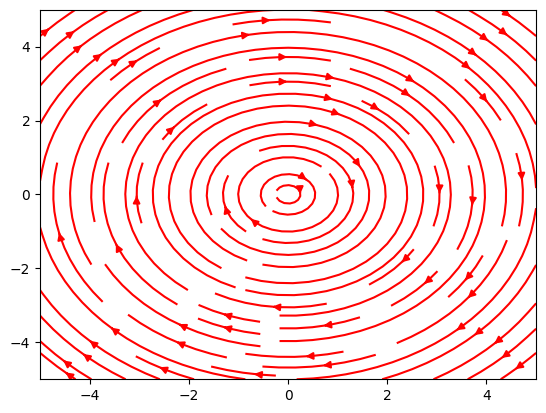

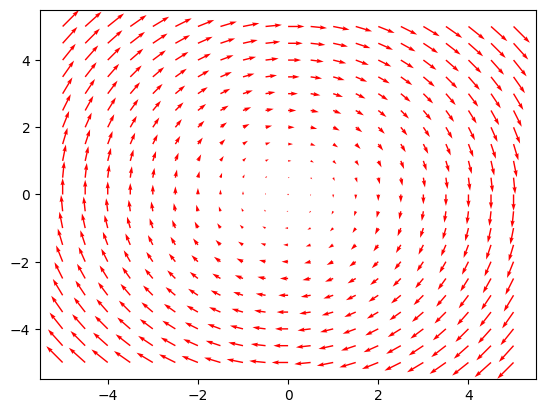

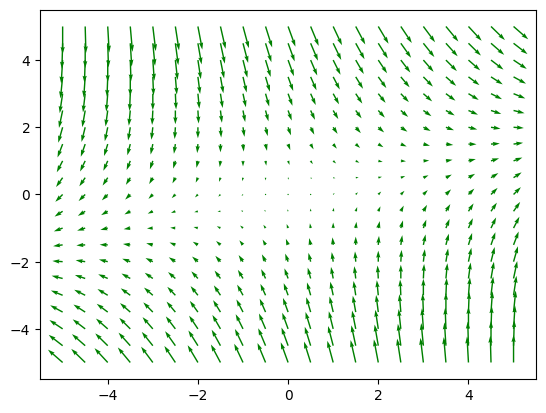

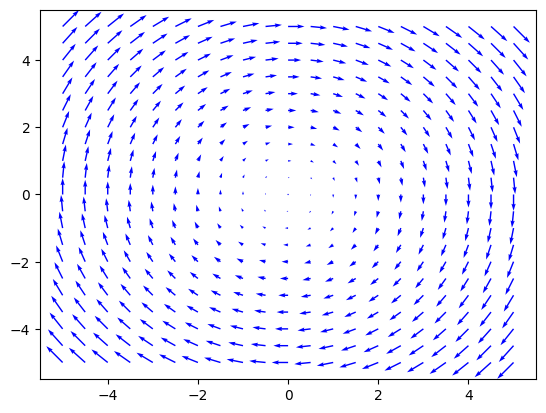

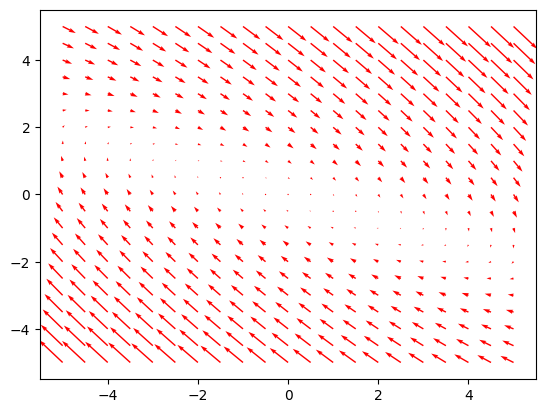

In [3]:
# Task D

# D1
# set intervals dx, dy
dx = 0.5
# define the range
x = np.arange(-5,5+dx,dx)

# create 2D grids
Xg , Yg = np.meshgrid(x,x)

# establish length of arrays
Nx = len(x)

# allocate an array for F: size is Nx by Nx by 2 (2 is because the vector has two components, i and j)
F = np.ndarray( (Nx,Nx,2) )
# set F: because we are using grids we can write formulas as we would do in Maths
# i component: slice only the first layer and assign values for all x and y
# j component: slice only the second layer and assign values for all x and y

# comment/uncomment, as appropriate
# (a)
#F[:,:,0] = Xg
#F[:,:,1] = Yg

# (b)
F[:,:,0] = Yg
F[:,:,1] = -Xg



# D2
# plot the streamlines of the vector field 
# Xg and Yg are the independent domain
# F[:,:,0], F[:,:,1] are the two components
pl.streamplot(Xg,Yg,F[:,:,0],F[:,:,1],color='r')
pl.show()

# plot the actual vectors
pl.quiver(Xg,Yg,F[:,:,0],F[:,:,1],color='r')
pl.show()


#D3
udef = np.ndarray( (Nx,Nx,2) )
uspin = np.ndarray( (Nx,Nx,2) )
u = np.ndarray( (Nx,Nx,2) )

udef[:,:,0] = 4*Xg+4*Yg
udef[:,:,1] = 4*Xg-11*Yg
pl.quiver(Xg,Yg,udef[:,:,0],udef[:,:,1],color='g')
pl.show()

uspin[:,:,0] = 10*Yg
uspin[:,:,1] = -10*Xg
pl.quiver(Xg,Yg,uspin[:,:,0],uspin[:,:,1],color='b')
pl.show()

u = udef + uspin
pl.quiver(Xg,Yg,u[:,:,0],u[:,:,1],color='r')
pl.show()


In [ ]:
# Task E

#E1
# read in two files
with open('Maths.txt') as f:
    Mt = [line.strip() for line in f]
with open('Computing.txt') as f:
    Ct = [line.strip() for line in f]

# convert string into floating numbers and then round to the nearest integer
Mm = [round(float(value)) for value in Mt]
Cm = [round(float(value)) for value in Ct]

Mm = np.array(Mm)
Cm = np.array(Cm) 

#count mark distribution
marks = np.linspace(0,100,101)
Md = np.zeros(len(marks)) 
Cd = np.zeros(len(marks)) 
for value in Mm:
    Md[value] += 1
for value in Cm:
    Cd[value] += 1   

    
pl.subplot(1,2,1)
pl.bar(marks,Md,color='red')
pl.bar(marks,Cd,color='blue')
pl.grid()
pl.xlabel('Marks')
pl.ylabel('Occurrences')
pl.legend(['Maths','Computing'])

pl.subplot(1,2,2)
pl.scatter(Cm,Mm,c='blue')
pl.axis('equal')
pl.grid()
pl.plot([0,100],[0,100],c='red',lw=8)
pl.xlabel('Computing')
pl.ylabel('Maths')

pl.show()


In [ ]:
#E2
d = 0.1
x = np.arange(-2,2+d,d)
y = np.arange(-3,3+d,d)
z = np.arange(-np.pi,2*np.pi,d)

Xg , Yg , Zg = np.meshgrid(x,y,z)

f = np.ndarray((len(x),len(y),len(z)))
f = Xg**2 + Yg**2 + Zg**2 - 5*np.sin(Zg)**2


fig = go.Figure(data=go.Isosurface(
    x=Xg.flatten(),
    y=Yg.flatten(),
    z=Zg.flatten(),
    value=f.flatten(),
    isomin=1,
    isomax=10,
    surface_count=5,
    opacity=0.6,
    ))
fig.show()

In [ ]:
# Task F

dx = 0.1
x = np.arange(-5,5+dx,dx)
y = np.sin(x)

# length of y
N = len(y)

# E1
# compute ym
ym = np.zeros(N)
ym[y<0]=-y[y<0]
ym[y>=0]=y[y>=0]
pl.plot(x,y,'r')
pl.plot(x,ym,'b+')

# E2
ymsat = np.zeros(N)
ymsat[ym<=0.5]=ym[ym<=0.5]
ymsat[ym>0.5]=0.5
ymsat[x<=0]=0
pl.plot(x,ymsat,'mx')